# Fetching observations from MET data base services

This notebook serves as sandbox for fetching data from frost.met, havvarsel-frost.met and thredds.met

See https://api.met.no/ for all interfaces and possible sources!!


## Havvarsel frost
Havvarsel frost delivers so far `temperature` measurements originated from badevann.no at seven beaches in the south of Norway (glider data integrated in the meantime, but not yet used here!). 
> Documentation:
> - API documentation for obs/badevann https://havvarsel-frost.met.no/docs/apiref#/obs%2Fbadevann/obsBadevannGet 
> - Datastructure described on https://havvarsel-frost.met.no/docs/dataset_badevann




In [6]:
# Importing general libraries
import sys
import json
import datetime
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Example to fetch time series

In [7]:
start_time = datetime.datetime.strptime("2021-10-01T00:00", "%Y-%m-%dT%H:%M")
end_time = datetime.datetime.strptime("2021-11-01T00:00", "%Y-%m-%dT%H:%M")


In [8]:
frost_api_base="https://havvarsel-frost.met.no"
endpoint = frost_api_base + "/api/v1/obs/badevann/get"

payload = {'time': str(start_time.isoformat()) + "Z/" + str(end_time.isoformat()) + "Z", 
                    'incobs':'true', 'buoyids': 38, 'parameter':'temperature'}
# the havvarsel-frost API uses colon in the url and does not replace them with ASCI what is default
payload_str = "&".join("%s=%s" % (k,v) for k,v in payload.items())

In [9]:
try:
    r = requests.get(endpoint, params=payload_str)
    print("Trying " + r.url)
    r.raise_for_status()
except requests.exceptions.HTTPError as err:
    raise Exception(err)


Trying https://havvarsel-frost.met.no/api/v1/obs/badevann/get?time=2021-10-01T00:00:00Z/2021-11-01T00:00:00Z&incobs=true&buoyids=38&parameter=temperature


### Explore available data

In [10]:
badevann_df = pd.DataFrame(columns=['buoyid', 'name', 'lat', 'lon'])

for id in range(150):
    try:
        payload = {'time': str(start_time.isoformat()) + "Z/" + str(end_time.isoformat()) + "Z", 
                    'incobs':'true', 'buoyids': id}
        payload_str = "&".join("%s=%s" % (k,v) for k,v in payload.items())
        r = requests.get(endpoint, params=payload_str)
        
        name = r.json()["data"]["tseries"][0]["header"]["extra"]["name"]
        lat = r.json()["data"]["tseries"][0]["header"]["extra"]["pos"]["lat"]
        lon = r.json()["data"]["tseries"][0]["header"]["extra"]["pos"]["lon"]
        badevann_df = badevann_df.append({"buoyid" : id, "name" : name, "lat" : lat, "lon" : lon}, ignore_index=True)
    except:
        pass

In [11]:
badevann_df

,buoyid,name,lat,lon
0,5,Aksdalsvatnet,59.416750,5.418333
1,7,Grønnavigå,58.988380,5.739830
2,10,Sjøbadet,63.435770,10.390610
3,11,Munkholmen,63.451380,10.384790
4,13,Vaulen,58.926347,5.750357
...,...,...,...,...
64,128,Volsdalsberga,62.467929,6.198442
65,129,Sandnessjøen havsbad,65.989325,12.623672
66,130,Mosvatnet,59.420210,6.447400
67,131,Våge,60.044350,5.524630


In [18]:
np.array(badevann_df["lon"],dtype=float)

array([ 5.418333,  5.73983 , 10.39061 , 10.38479 ,  5.750357,  5.7565  ,
        5.749064,  5.67038 ,  5.84833 ,  7.77995 ,  6.14862 ,  6.20512 ,
       10.18897 , 10.256319, 14.52015 ,  7.445817,  9.24742 ,  9.29329 ,
       10.166689,  7.075648,  8.924298,  9.41161 ,  5.83113 ,  5.600898,
        8.768082,  9.653091,  5.57011 ,  6.06663 , 10.204986, 10.217581,
       10.148371,  5.57708 ,  5.4646  ,  9.0674  , 12.359083, 23.20955 ,
        7.066029,  5.271909,  6.159887,  6.19068 ,  6.163875,  7.216942,
        7.169704,  7.083187,  8.007728, 10.7497  ,  5.240368,  5.300414,
        5.481414, 11.27526 , 11.58126 , 10.34212 , 11.29408 , 10.88002 ,
       10.80266 ,  6.348284,  5.679755,  6.320553,  6.314661, 18.90523 ,
        6.568206,  5.626298, 10.651787,  7.471262,  6.198442, 12.623672,
        6.4474  ,  5.52463 ,  5.878336])

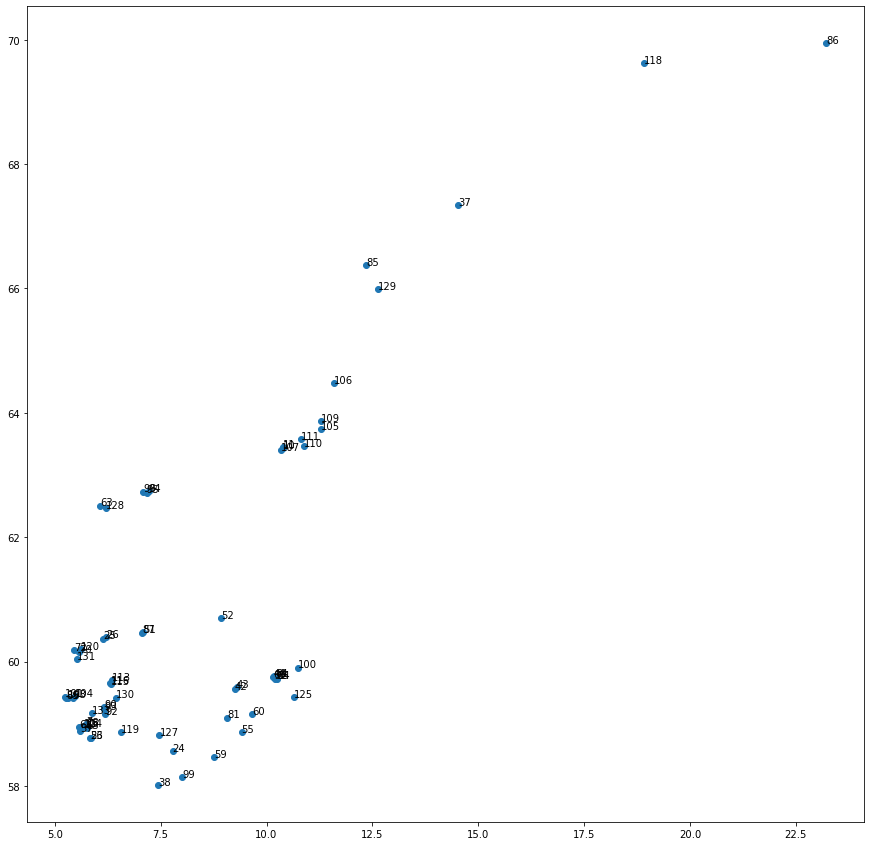

In [22]:
lon = np.array(badevann_df["lon"],dtype=float)
lat = np.array(badevann_df["lat"],dtype=float)
buoyid = np.array(badevann_df["buoyid"],dtype=int)

fig, ax = plt.subplots(1,1,figsize=(15,15))
ax.scatter(np.array(badevann_df["lon"],dtype=float), np.array(badevann_df["lat"],dtype=float))

for i, txt in enumerate(buoyid):
    ax.annotate(str(txt), (lon[i], lat[i]))

In [15]:
badevann_df["lat"]

0     59.416750
1     58.988380
2     63.435770
3     63.451380
4     58.926347
        ...    
64    62.467929
65    65.989325
66    59.420210
67    60.044350
68    59.165627
Name: lat, Length: 69, dtype: object

In [ ]:
nc = netCDF4.MFDataset(["https://thredds.met.no/thredds/dodsC/metpparchive/2020/09/01/met_analysis_1_0km_nordic_20200901T00Z.nc", 
"https://thredds.met.no/thredds/dodsC/metpparchive/2020/09/02/met_analysis_1_0km_nordic_20200902T00Z.nc"])

In [ ]:
nc.variables.keys()

dict_keys(['ensemble_member', 'forecast_reference_time', 'projection_lcc', 'time', 'x', 'y', 'air_pressure_at_sea_level', 'air_temperature_2m', 'altitude', 'cloud_area_fraction', 'integral_of_surface_downwelling_shortwave_flux_in_air_wrt_time', 'land_area_fraction', 'latitude', 'longitude', 'precipitation_amount', 'relative_humidity_2m', 'wind_direction_10m', 'wind_speed_10m'])

In [ ]:
lon =  10.7166638
lat =  59.933329

In [ ]:
proj_args = nc.variables["projection_lcc"].proj4
p = proj.Proj(str(proj_args))

xp,yp = p(lon,lat)
lats = nc.variables["latitude"][:]
lons = nc.variables["longitude"][:]
xps,yps = p(lons,lats)

In [ ]:
x = (np.abs(xps[0,:]-xp)).argmin()
y = (np.abs(yps[:,0]-yp)).argmin()

In [ ]:
cftimes = netCDF4.num2date(nc.variables["time"][:], nc.variables["time"].units)

datetimes = []
for t in range(len(cftimes)):
    new_datetime = datetime.datetime(cftimes[t].year, cftimes[t].month, cftimes[t].day, cftimes[t].hour, cftimes[t].minute)
    datetimes.append(new_datetime)

In [ ]:
timeseries = pd.DataFrame()

In [ ]:
param = "air_temperature_2m"

# EXTRACT DATA
data = nc.variables[param][:,y,x]

# Dataframe for return
new_timeseries = pd.DataFrame({"referenceTime":datetimes, param:data})

#NOTE: Since the other data sources explicitly specify the time zone
# the tz is manually added to the datetime here
new_timeseries["referenceTime"] = new_timeseries["referenceTime"].dt.tz_localize(tz="UTC") 
            
# Outer joining dataset
if timeseries.empty:
    timeseries = new_timeseries
else:
    timeseries = pd.merge(timeseries.set_index("referenceTime"), new_timeseries.set_index("referenceTime")[param], how="outer", on="referenceTime")
    timeseries = timeseries.reset_index()


In [ ]:
timeseries

,referenceTime,air_temperature_2m
0,2020-09-01 00:00:00+00:00,280.250000
1,2020-09-02 00:00:00+00:00,282.049988


In [ ]:
param = "wind_speed_10m"

# EXTRACT DATA
data = nc.variables[param][:,y,x]

# Dataframe for return
new_timeseries = pd.DataFrame({"referenceTime":datetimes, param:data})

#NOTE: Since the other data sources explicitly specify the time zone
# the tz is manually added to the datetime here
new_timeseries["referenceTime"] = new_timeseries["referenceTime"].dt.tz_localize(tz="UTC") 
            
# Outer joining dataset
if timeseries.empty:
    timeseries = new_timeseries
else:
    timeseries = pd.merge(timeseries.set_index("referenceTime"), new_timeseries.set_index("referenceTime")[param], how="outer", on="referenceTime")
    timeseries = timeseries.reset_index()


In [ ]:
timeseries

,referenceTime,air_temperature_2m,wind_speed_10m
0,2020-09-01 00:00:00+00:00,280.250000,1.419991
1,2020-09-02 00:00:00+00:00,282.049988,1.404837


In [ ]:
param = 'cloud_area_fraction'

# EXTRACT DATA
data = nc.variables[param][:,y,x]

# Dataframe for return
new_timeseries = pd.DataFrame({"referenceTime":datetimes, param:data})

#NOTE: Since the other data sources explicitly specify the time zone
# the tz is manually added to the datetime here
new_timeseries["referenceTime"] = new_timeseries["referenceTime"].dt.tz_localize(tz="UTC") 
            
# Outer joining dataset
if timeseries.empty:
    timeseries = new_timeseries
else:
    timeseries = pd.merge(timeseries.set_index("referenceTime"), new_timeseries.set_index("referenceTime")[param], how="outer", on="referenceTime")



In [ ]:
timeseries

,air_temperature_2m,wind_speed_10m,cloud_area_fraction
referenceTime,,,
2020-09-01 00:00:00+00:00,280.250000,1.419991,0.0
2020-09-02 00:00:00+00:00,282.049988,1.404837,0.0


In [ ]:
times = pd.date_range(start_time, end_time, freq="H")

In [ ]:
times = times.tz_localize("UTC")

In [ ]:
data = pd.DataFrame(times, columns=["time"])

,index,time
0,0,2020-01-01 00:00:00+00:00
1,1,2020-01-01 01:00:00+00:00
2,2,2020-01-01 02:00:00+00:00
3,3,2020-01-01 03:00:00+00:00
4,4,2020-01-01 04:00:00+00:00
5,5,2020-01-01 05:00:00+00:00
6,6,2020-01-01 06:00:00+00:00
7,7,2020-01-01 07:00:00+00:00
8,8,2020-01-01 08:00:00+00:00
9,9,2020-01-01 09:00:00+00:00
